In [37]:
import random
import json

def simulate_game(n_good_initial, k_bad_initial,starting_payout=0 ):
    """
    Simulates a single game based on the updated rules.

    Args:
        n_good_initial (int): Initial number of good players.
        k_bad_initial (int): Initial number of bad players.

    Returns:
        dict: Outcome of the game containing winner, payouts, and remaining players.
    """
    # Initialize the list of players
    # 'G' represents a good player, 'B' represents a bad player
    players = ['G'] * n_good_initial + ['B'] * k_bad_initial
    payout_cumulated = starting_payout
    while True:
        payout_cumulated += 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination based on new rules
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }

        # Step 1: Bad players kill a good player
        if n_good > 0 and n_bad > 0:
            # Randomly select a good player to be killed
            good_indices = [i for i, p in enumerate(players) if p == 'G']
            killed_good_player = random.choice(good_indices)
            players.pop(killed_good_player)

        # Update counts after step 1
        n_good = players.count('G')
        n_bad = players.count('B')

        # Check for termination after step 1
        if n_good == 0:
            # Bad team wins
            remaining = n_bad
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': 0,
                'remaining_bad': remaining
            }
        if n_bad == 0:
            # Good team wins
            remaining = n_good
            payout = payout_cumulated /  remaining
            return {
                'winner': 'Good',
                'payouts': [payout] * remaining,
                'remaining_good': remaining,
                'remaining_bad': 0
            }
        if n_good <= n_bad:
            # Bad team wins as per the new condition
            remaining = n_bad
            payout = payout_cumulated / remaining
            return {
                'winner': 'Bad',
                'payouts': [payout] * remaining,
                'remaining_good': n_good,
                'remaining_bad': remaining
            }

        # Step 2: Random player dies
        dead_player = random.choice(players)
        players.remove(dead_player)

def monte_carlo_simulation(n_good, k_bad, starting_payout, num_simulations=1000):
    """
    Runs the Monte Carlo simulation based on the updated game rules.

    Args:
        n_good (int): Initial number of good players.
        k_bad (int): Initial number of bad players.
        num_simulations (int): Number of simulations to run.

    Returns:
        dict: Aggregated results including expected payouts and win probabilities.
    """
    total_payout_good = 0.0
    total_payout_bad = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_list=[]

    for _ in range(num_simulations):
        result = simulate_game(n_good, k_bad, starting_payout)
        winner = result['winner']
        payout = result['payouts'][0]
        remaining_good = result['remaining_good']
        remaining_bad = result['remaining_bad']
        turns=sum(result['payouts'])-starting_payout
        turns_list.append(turns)

        if winner == 'Good':
            count_wins_good += 1
            # Each good player receives payout = 1 / remaining_good
            # Total payout for good team = 1 (since 1/remaining_good * remaining_good)
            total_payout_good += payout
            # Bad players receive nothing
        else:
            count_wins_bad += 1
            # Each bad player receives payout = 1 / remaining_bad
            # Total payout for bad team = 1 (since 1/remaining_bad * remaining_bad)
            total_payout_bad += payout
            # Good players receive nothing

    # Calculate expected payouts per player
    expected_payout_good = (total_payout_good / num_simulations) / n_good
    expected_payout_bad = (total_payout_bad / num_simulations) / k_bad
    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations
    

    return {
        'Expected Payout per Good Player': expected_payout_good,
        'Expected Payout per Bad Player': expected_payout_bad,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Average number of turns': sum(turns_list)/num_simulations,
        'Turns': turns_list
    }

# Parameters
n = 19  # Number of good players
k = 3   # Number of bad players
num_simulations = 100000
starting_payout = 1
# Run the simulation
results = monte_carlo_simulation(n, k,starting_payout, num_simulations)

# Display the results
print("Monte Carlo Simulation Results (After Modification):")
print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
print(f"Average number of turns: {results['Average number of turns']:.2f}")

turns_list = results['Turns']
# turns_list


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 0.0686
Expected Payout per Bad Player: 1.8390
Probability Good Team Wins: 33.34%
Probability Bad Team Wins: 66.66%
Average number of turns: 10.19


In [38]:
import random

def simulate_game(n_good_initial, k_bad_initial, players, daily_payout=1, starting_payout=0):
    payout_cumulated = starting_payout
    turns = 0
    shield_hits = 0
    shield_protected = 0
    while True:
        payout_cumulated += daily_payout
        turns += 1
        n_good = sum(1 for p in players if p['current'] == 'G')
        n_bad = sum(1 for p in players if p['current'] == 'B')
        
        while n_good + n_bad <= 5:
            alive_players = [p for p in players if p['current'] in ('G', 'B')]
            dead_player = random.choice(alive_players)
            if dead_player['current'] == 'G':
                n_good -= 1
            else:
                n_bad -= 1
            dead_player['current'] = 'X'
            if n_good == 0 or n_good <= n_bad:
                # Bad team wins
                payouts = [payout_cumulated/n_bad if p['current'] == 'B' else 0 for p in players]
                return {
                    'winner': 'Bad',
                    'players': players,
                    'payouts': payouts,
                    'remaining_good': 0,
                    'remaining_bad': n_bad,
                    'turns': turns,
                    'protections': shield_protected,
                    'hits': shield_hits,
                }
            if n_bad == 0:
                # Good team wins
                payouts = [payout_cumulated/n_good if p['current'] == 'G' else 0 for p in players]
                return {
                    'winner': 'Good',
                    'players': players,
                    'payouts': payouts,
                    'remaining_good': n_good,
                    'remaining_bad': 0,
                    'turns': turns,
                    'protections': shield_protected,
                    'hits': shield_hits,
                }
        if n_bad == 1 and n_good > 0:
            good_players = [p for p in players if p['current'] == 'G']
            selected_player = random.choice(good_players)
            selected_player['current'] = 'B'
            n_good -= 1
            n_bad += 1
        if n_good > 0 and n_bad > 0:
            good_players = [p for p in players if p['current'] == 'G']
            shieldable_players = [p for p in players if p['current'] in ('G', 'B')]

            killed_player = random.choice(good_players)
            shielded_player = random.choice(shieldable_players)
            if killed_player is not shielded_player:
                killed_player['current'] = 'X'
                n_good -= 1
                shield_hits += 1
            else:
                shield_protected += 1

        # Step 2: Random player dies
        alive_players = [p for p in players if p['current'] in ('G', 'B')]
        dead_player = random.choice(alive_players)
        if dead_player['current'] == 'G':
            n_good -= 1
        else:
            n_bad -= 1
        dead_player['current'] = 'X'

def monte_carlo_simulation(n_good, k_bad, starting_payout, daily_payout=1, num_simulations=1000):
    total_good_winnings = 0.0
    total_bad_winnings = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_list = []
    total_kills = 0.0
    total_defences = 0.0

    for _ in range(num_simulations):
        players = [{'role': 'G', 'current': 'G'} for _ in range(n_good)] + [{'role': 'B', 'current': 'B'} for _ in range(k_bad)]

        result = simulate_game(n_good, k_bad, players, daily_payout, starting_payout)
        winner = result['winner']
        payouts = result['payouts']
        turns = result['turns']
        players = result['players']
        total_defences += result['protections']
        total_kills += result['hits']
        turns_list.append(turns)
        # print(players)

        if winner == 'Good':
            count_wins_good += 1
        else:
            count_wins_bad += 1

        for (p, w) in zip(players, payouts):
            if p['role'] == "B":
                total_bad_winnings += w
            if p['role'] == "G":
                total_good_winnings += w


    expected_payout_good = total_good_winnings / num_simulations / n_good
    expected_payout_bad = total_bad_winnings / num_simulations / k_bad
    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations

    return {
        'Expected Payout per Good Player': expected_payout_good,
        'Expected Payout per Bad Player': expected_payout_bad,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Average number of turns': sum(turns_list) / num_simulations,
        'Turns': turns_list,
        'Shield saves out of all kills': total_defences /(total_defences + total_kills)
    }
n = 19  # Number of good players
k = 3   # Number of bad players
num_simulations = 10000
starting_payout = 1
daily_payout = 1
results = monte_carlo_simulation(n, k, starting_payout, daily_payout, num_simulations)
print("Monte Carlo Simulation Results (After Modification):")
print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
print(f"Average number of turns: {results['Average number of turns']:.2f}")
print(f"Shield saves out of all kills {results['Shield saves out of all kills']}")

Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 0.2904
Expected Payout per Bad Player: 1.8817
Probability Good Team Wins: 29.57%
Probability Bad Team Wins: 70.43%
Average number of turns: 10.16
Shield saves out of all kills 0.08339699238274004


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 714369.4737
Expected Payout per Bad Player: 2518230.0000
Probability Good Team Wins: 30.10%
Probability Bad Team Wins: 69.90%
Average number of turns: 9.12
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 529869.7368
Expected Payout per Bad Player: 3013707.5000
Probability Good Team Wins: 31.70%
Probability Bad Team Wins: 68.30%
Average number of turns: 9.49
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 394917.6316
Expected Payout per Bad Player: 2866071.6667
Probability Good Team Wins: 27.80%
Probability Bad Team Wins: 72.20%
Average number of turns: 10.16
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 310252.3684
Expected Payout per Bad Player: 2552693.7500
Probability Good Team Wins: 25.20%
Probability Bad Team Wins: 74.80%
Average number of turns: 10.56
Monte Carlo Simulation Results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


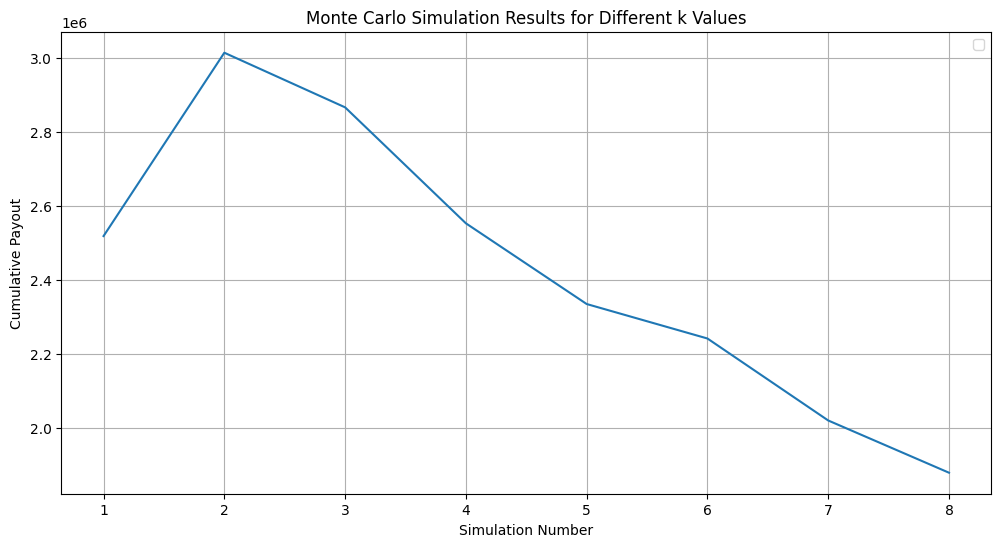

In [39]:
import matplotlib.pyplot as plt
n = 19  # Number of good players
k_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Different numbers of bad players
num_simulations = 10000
starting_payout = 16_000_000
daily_payout = 0

# Run the simulation for each k and plot the results
plt.figure(figsize=(12, 6))
payouts=[]
for k in k_values:
    results = monte_carlo_simulation(n, k, starting_payout, num_simulations)
    payouts.append(results['Expected Payout per Bad Player'])
    print("Monte Carlo Simulation Results (After Modification):")
    print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
    print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
    print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
    print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
    print(f"Average number of turns: {results['Average number of turns']:.2f}")

plt.plot( k_values, payouts,)
plt.xticks(k_values)
plt.xlabel('Simulation Number')
plt.ylabel('Cumulative Payout')
plt.title('Monte Carlo Simulation Results for Different k Values')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
import random

def simulate_game_modified(players, daily_payout=1, starting_payout=0):
    payout_cumulated = starting_payout
    turns = 0
    shield_hits = 0
    shield_protected = 0
    
    # print("Starting simulation...")
    # print(f"Initial Players: {[p['name'] for p in players]}\n")
    
    while True:
        payout_cumulated += daily_payout
        turns += 1
        n_good = sum(1 for p in players if p['current'] == 'G')
        n_bad = sum(1 for p in players if p['current'] == 'B')
        
        # print(f"Turn {turns}: Good Players = {n_good}, Bad Players = {n_bad}, Total Payout = {payout_cumulated}")
        
        # If the number of players remaining is less than or equal to 5, random players start dying
        while n_good + n_bad <= 5:
            alive_players = [p for p in players if p['current'] in ('G', 'B')]
            # print(alive_players, n_good, n_bad)
            # print(players)
            dead_player = random.choice(alive_players)
            dead_player['current'] = 'X'
            
            if dead_player['role'] == 'G':
                n_good -= 1
                # print(f"{dead_player['name']} (Good) has been eliminated.")
            else:
                n_bad -= 1
                # print(f"{dead_player['name']} (Bad) has been eliminated.")

            # Determine if the game ends
            if n_good == 0 or n_good <= n_bad:
                # print("\nBad team wins!")
                payouts = [payout_cumulated / n_bad if p['current'] == 'B' else 0 for p in players]
                return {
                    'winner': 'Bad',
                    'players': players,
                    'payouts': payouts,
                    'remaining_good': 0,
                    'remaining_bad': n_bad,
                    'turns': turns,
                    'protections': shield_protected,
                    'hits': shield_hits,
                }
            if n_bad == 0:
                # print("\nGood team wins!")
                payouts = [payout_cumulated / n_good if p['current'] == 'G' else 0 for p in players]
                return {
                    'winner': 'Good',
                    'players': players,
                    'payouts': payouts,
                    'remaining_good': n_good,
                    'remaining_bad': 0,
                    'turns': turns,
                    'protections': shield_protected,
                    'hits': shield_hits,
                }
        
        # If there's only one bad player and good players are still alive, convert one good player to bad
        if n_bad == 1 and n_good > 0:
            good_players = [p for p in players if p['current'] == 'G']
            selected_player = random.choice(good_players)
            selected_player['current'] = 'B'
            n_good -= 1
            n_bad += 1
            # print(f"{selected_player['name']} has been converted to Bad.")
        
        # If there are both good and bad players alive
        if n_good > 0 and n_bad > 0:
            good_players = [p for p in players if p['current'] == 'G']
            shieldable_players = [p for p in players if p['current'] in ('G', 'B')]

            killed_player = random.choice(good_players)
            shielded_player = random.choice(shieldable_players)

            if killed_player is not shielded_player:
                killed_player['current'] = 'X'
                n_good -= 1
                shield_hits += 1
                # print(f"{killed_player['name']} (Good) was killed by the Bad team.")
            else:
                shield_protected += 1
                # print(f"{shielded_player['name']} was shielded and survived an attack.")

        # Random player dies in step 2
        alive_players = [p for p in players if p['current'] in ('G', 'B')]
        dead_player = random.choice(alive_players)
        dead_player['current'] = 'X'

        if dead_player['role'] == 'G':
            n_good -= 1
            # print(f"{dead_player['name']} (Good) has been randomly eliminated.")
        else:
            n_bad -= 1
            # print(f"{dead_player['name']} (Bad) has been randomly eliminated.")


def monte_carlo_simulation_modified(starting_payout, daily_payout=1, num_simulations=1000, player_state=[]):
    total_good_winnings = 0.0
    total_bad_winnings = 0.0
    count_wins_good = 0
    count_wins_bad = 0
    turns_list = []
    total_kills = 0.0
    total_defences = 0.0
    n_good=sum([1 for s in player_state if s['role']== 'G'])
    n_bad=sum([1 for s in player_state if s['role']== 'B'])

    for _ in range(num_simulations):
        import copy

        players = copy.deepcopy(player_state)
        result = simulate_game_modified(players, daily_payout, starting_payout)
        winner = result['winner']
        payouts = result['payouts']
        turns = result['turns']
        players = result['players']
        total_defences += result['protections']
        total_kills += result['hits']
        turns_list.append(turns)
        # print(players)
        for (og, sim) in zip(player_state, payouts):
            og['total'] += sim
    
        if winner == 'Good':
            count_wins_good += 1
        else:
            count_wins_bad += 1

        for (p, w) in zip(players, payouts):
            if p['role'] == "B":
                total_bad_winnings += w
            if p['role'] == "G":
                total_good_winnings += w

    for og in player_state:
        og['total'] /= num_simulations
        if og['role'] == 'G':
            og['total_math'] = total_good_winnings/num_simulations/n_good
        if og['role'] == 'B':
            og['total_math'] = total_bad_winnings/num_simulations/n_bad
        if og['role'] == 'X':
            og['total_math'] =0

    probability_win_good = count_wins_good / num_simulations
    probability_win_bad = count_wins_bad / num_simulations

    return {
        'player_state': player_state,
        'Probability Good Wins': probability_win_good,
        'Probability Bad Wins': probability_win_bad,
        'Average number of turns': sum(turns_list) / num_simulations,
        'Turns': turns_list,
        'Shield saves out of all kills': total_defences /(total_defences + total_kills)
    }
    
    

In [41]:
def get_players_for_episode(data, episode_num):
    players = []

    for player in data:
        name = player['name']
        episodes = player['episodes']
        role = 'G'  # Default initial role is 'Good'
        current_role = 'G'
        alive = True  # Assume player is alive until proven otherwise

        # Process each episode up to the given episode number
        for ep in range(1, episode_num + 1):
            ep_str = str(ep)
            status = episodes.get(ep_str)

            if not status:
                # If no status is provided for this episode, assume the player is no longer in the game
                alive = False
                role = 'X'
                current_role = 'X'
                break

            if status == 'Traitor':
                # Player becomes or remains a traitor
                current_role = 'B'
                if role == 'G':
                    role = 'B'  # Update initial role if the player became a traitor
            elif status in ['Dead', 'Quit', 'Out']:
                # Player is no longer active in the game
                alive = False
                role = 'X'
                current_role = 'X'
                break  # Stop processing further episodes
            elif status in ['Alive', 'Winner', 'Risk']:
                # Player remains alive and in the game
                continue
            else:
                # Unknown or unhandled status
                continue

        player_dict = {
            'name': name,
            'role': role,           # Initial role at the start of the game
            'current': current_role,  # Current role in the given episode
            'alive': alive,          # Whether the player is alive in the given episode
            'total': 0,
        }

        players.append(player_dict)

    return players


file_path = './season_1.json'


with open(file_path, 'r', encoding="utf-8") as json_file:
    data = json.load(json_file)
    # Print the data to see the content
    print(data)

[{'name': 'Szabados Ágnes', 'episodes': {'1': 'Alive', '2': 'Alive', '3': 'Alive', '4': 'Alive', '5': 'Alive', '6': 'Alive', '7': 'Alive', '8': 'Alive', '9': 'Alive', '10': 'Alive', '11': 'Alive', '12': 'Winner'}}, {'name': 'Tapasztó Orsi', 'episodes': {'1': 'Alive', '2': 'Alive', '3': 'Alive', '4': 'Alive', '5': 'Alive', '6': 'Alive', '7': 'Alive', '8': 'Alive', '9': 'Alive', '10': 'Alive', '11': 'Alive', '12': 'Winner'}}, {'name': 'Mohai Tamás', 'episodes': {'1': 'Alive', '2': 'Alive', '3': 'Alive', '4': 'Alive', '5': 'Alive', '6': 'Alive', '7': 'Alive', '8': 'Alive', '9': 'Alive', '10': 'Alive', '11': 'Alive', '12': 'Winner'}}, {'name': 'Törőcsik Dániel', 'episodes': {'1': 'Alive', '2': 'Alive', '3': 'Alive', '4': 'Alive', '5': 'Alive', '6': 'Traitor', '7': 'Traitor', '8': 'Traitor', '9': 'Traitor', '10': 'Traitor', '11': 'Dead', '12': 'Dead'}}, {'name': 'Nádai Anikó', 'episodes': {'1': 'Alive', '2': 'Alive', '3': 'Alive', '4': 'Alive', '5': 'Alive', '6': 'Alive', '7': 'Alive', '8':

In [42]:

def run_all_episodes(data):
   # Assuming 'data' contains the JSON data provided earlier
    results_all={}
    for episode_num in range(1,11):
        players_in_episode = get_players_for_episode(data, episode_num)

        print(f"Players in Episode {episode_num}:")
        for player in players_in_episode:
            print(player)

        n = 19  # Number of good players
        k = 3   # Number of bad players
        num_simulations = 10000
        starting_payout = 16
        daily_payout = 0
        results = monte_carlo_simulation_modified( starting_payout, daily_payout, num_simulations, players_in_episode)
        print("Monte Carlo Simulation Results (After Modification):")
        for player in results['player_state']:
            print(player)
        # print(results['player_state'])
        print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
        print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
        print(f"Average number of turns: {results['Average number of turns']:.2f}")
        print(f"Shield saves out of all kills {results['Shield saves out of all kills']}")
        results_all[episode_num]=results['player_state']
    return results_all
    
results_all = run_all_episodes(data)

Players in Episode 1:
{'name': 'Szabados Ágnes', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Tapasztó Orsi', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Mohai Tamás', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Törőcsik Dániel', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Nádai Anikó', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Nyáry Luca', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Gyenesei Leila', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Szalay Bence', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Varga Ferenc', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Solti Ádám', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Vásáry André', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'name': 'Horváth Éva', 'role': 'G', 'current': 'G', 'alive': True, 'total': 0}
{'nam

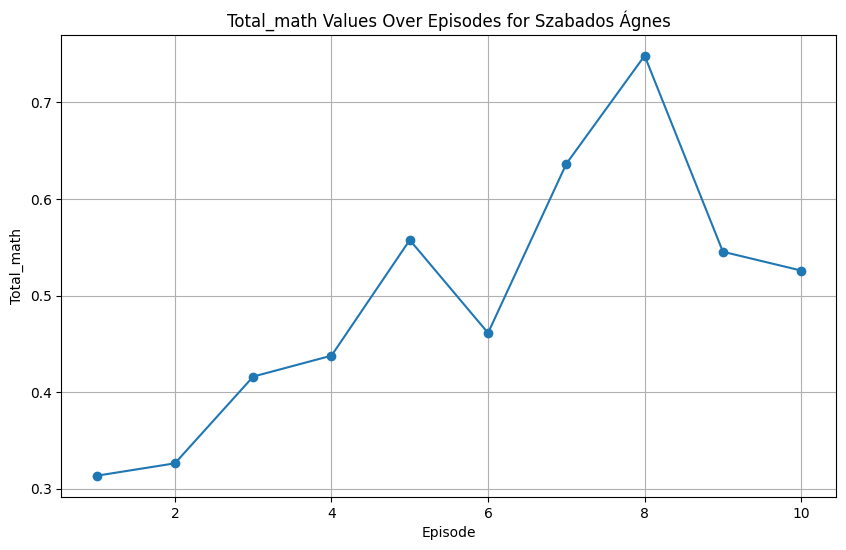

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

def create_total_math_dataframe(results_all):
    # Collect all unique player names
    player_names = set()
    for episode in results_all:
        for player in results_all[episode]:
            player_names.add(player['name'])
    player_names = sorted(player_names)

    # Initialize the DataFrame
    df = pd.DataFrame(index=player_names, columns=sorted(results_all.keys()))

    # Fill the DataFrame with total_math values
    for episode in results_all:
        for player in results_all[episode]:
            name = player['name']
            total_math = player['total_math']
            df.loc[name, episode] = total_math

    # Convert data to float type
    df = df.astype(float)
    return df

def plot_player_timeseries(df, player_name):
    if player_name in df.index:
        plt.figure(figsize=(10, 6))
        df.loc[player_name].plot(marker='o')
        plt.title(f"Total_math Values Over Episodes for {player_name}")
        plt.xlabel("Episode")
        plt.ylabel("Total_math")
        plt.grid(True)
        plt.show()
    else:
        print(f"Player {player_name} not found in the data.")

# Assuming 'results_all' is your dictionary with simulation results
df_total_math = create_total_math_dataframe(results_all)

# Example: Plotting the time series for a specific player
player_to_plot = 'Szabados Ágnes'  # Replace with any player's name
plot_player_timeseries(df_total_math, player_to_plot)


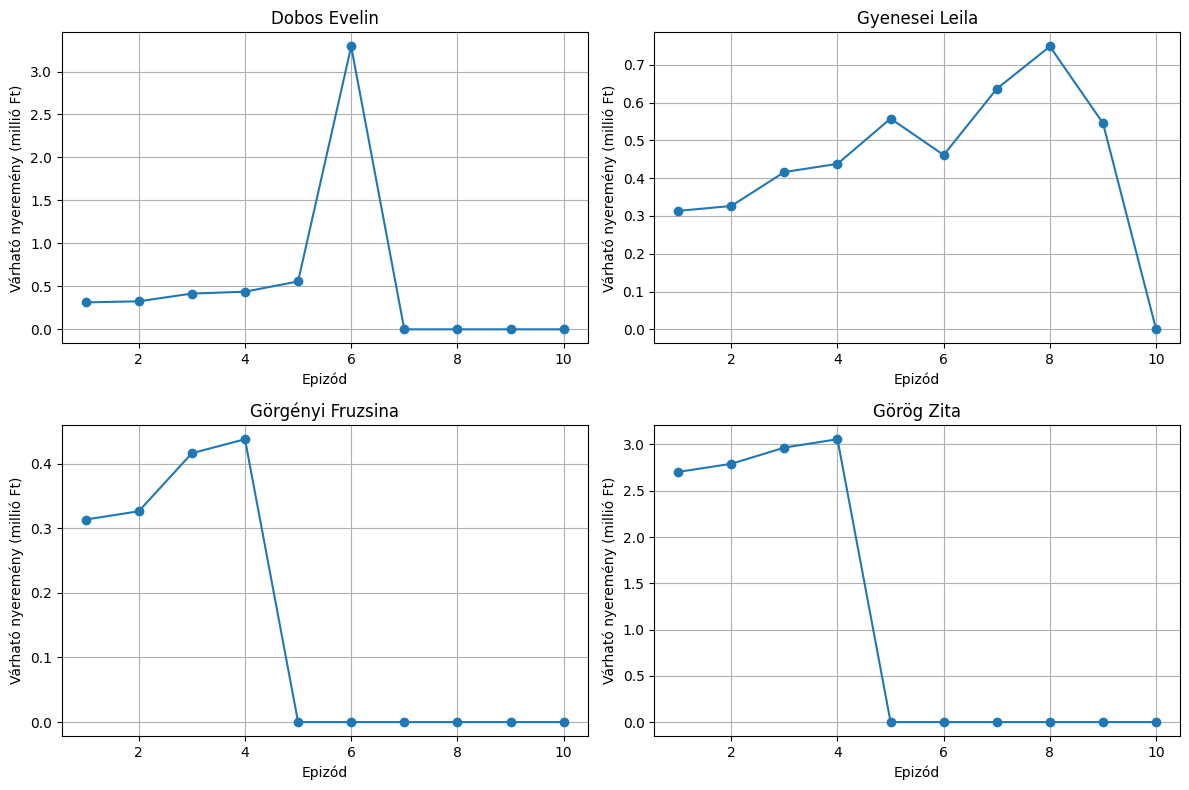

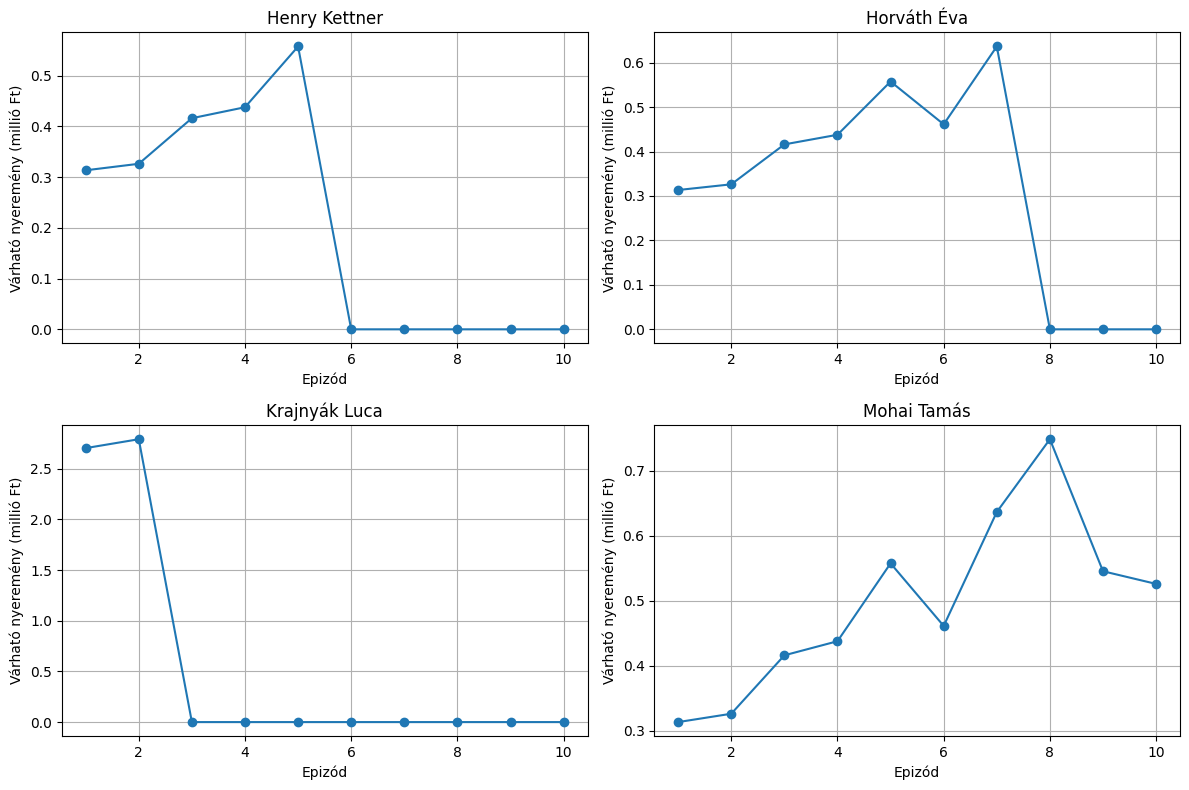

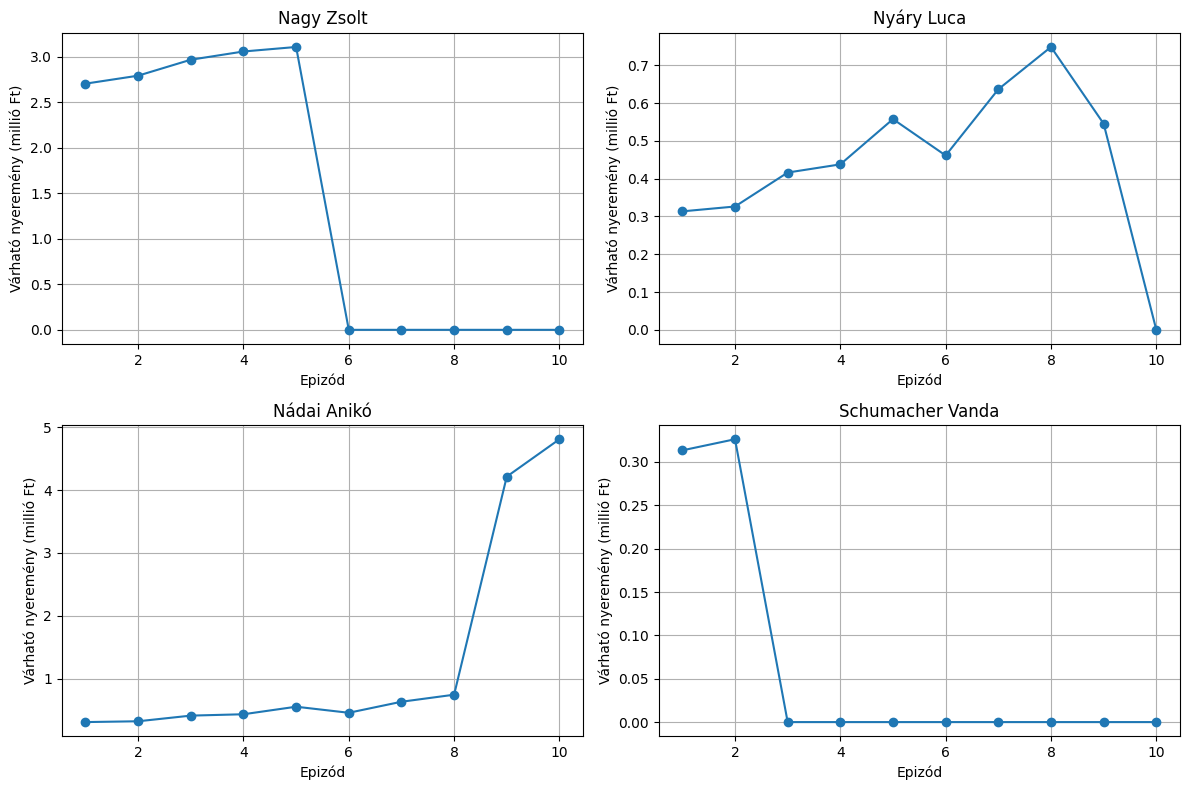

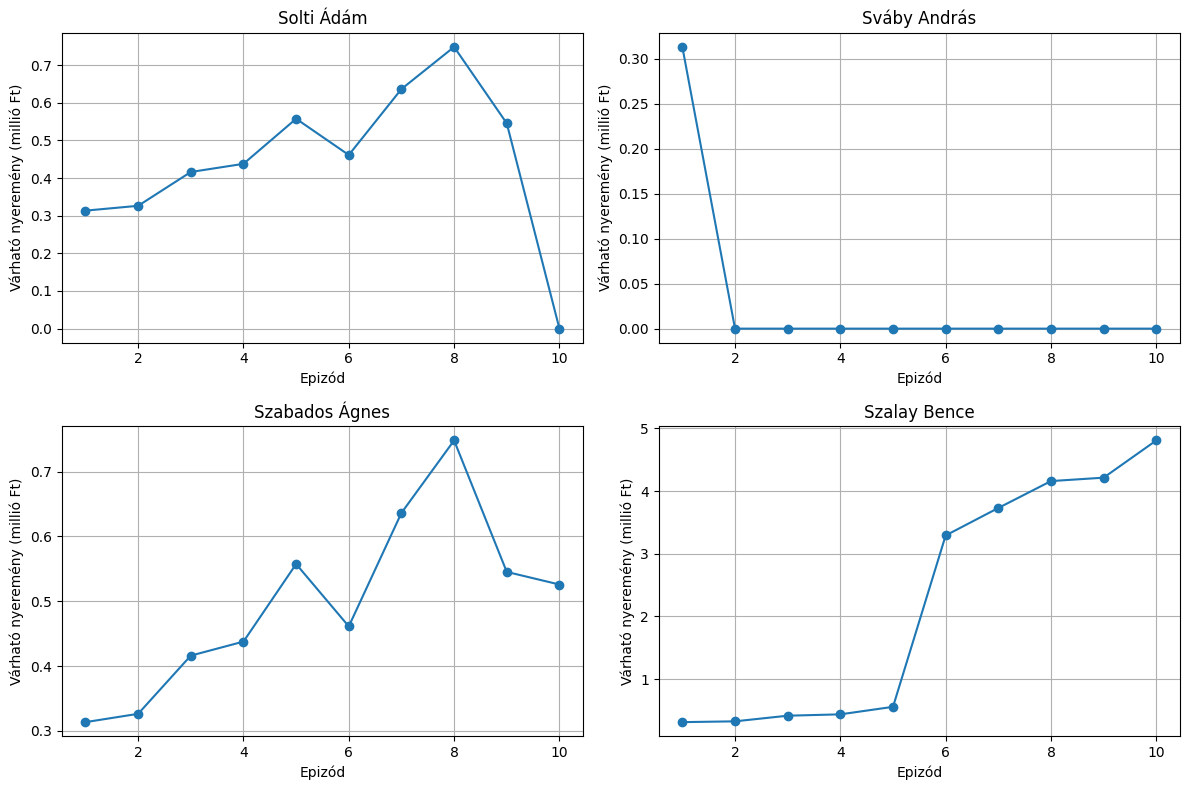

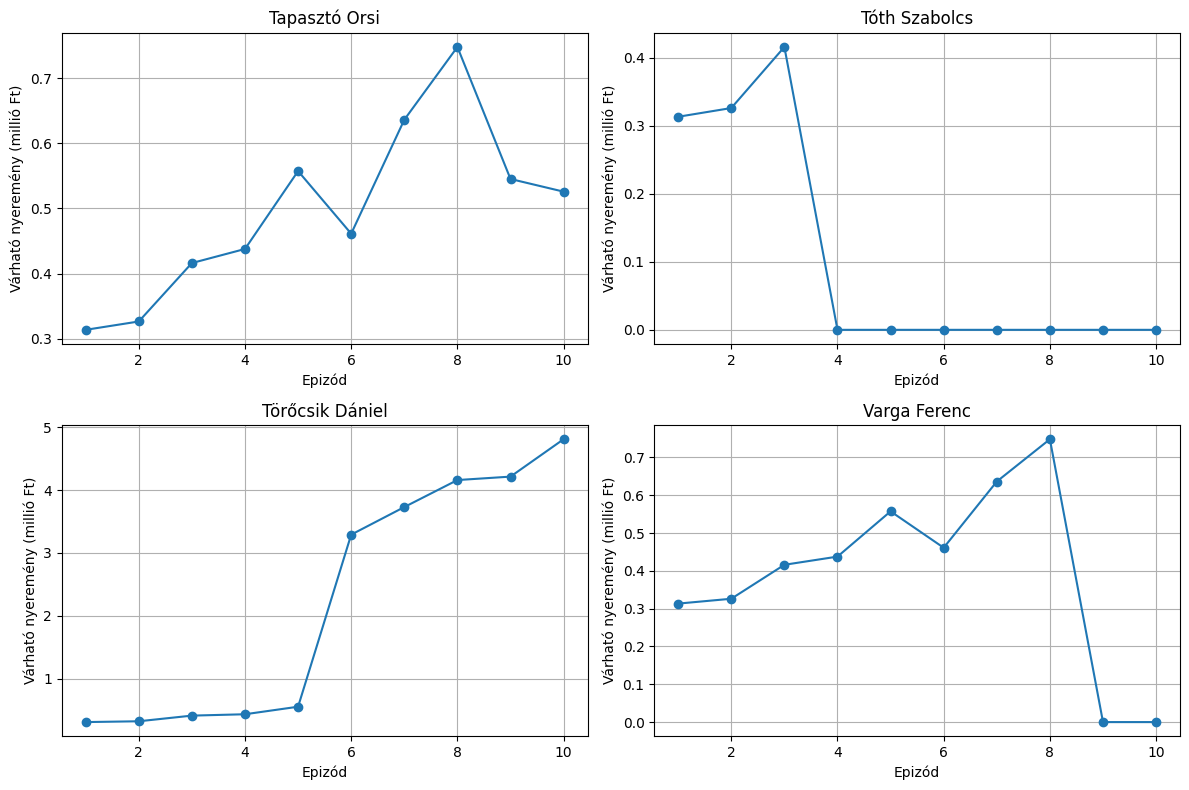

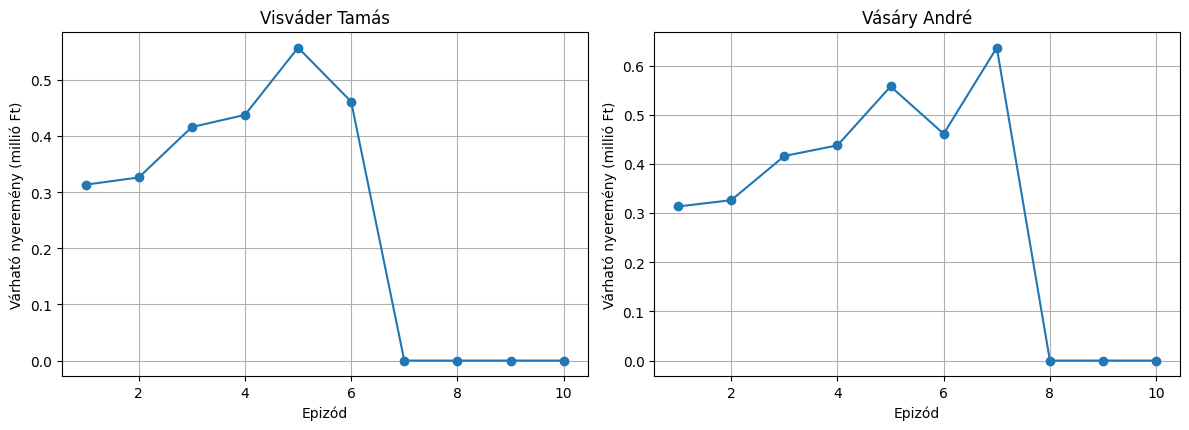

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import os

# Define the directory where you want to save the SVG files
output_dir = r'C:/Mate/Balint/blog/ETI-blog/static/arulok'

# Ensure the output directory exists
os.makedirs(output_dir, exist_ok=True)

def plot_all_players_in_batches(df, batch_size=4):
    player_names = df.index.tolist()
    num_players = len(player_names)
    num_batches = math.ceil(num_players / batch_size)

    for batch_num in range(num_batches):
        batch_players = player_names[batch_num*batch_size : (batch_num+1)*batch_size]
        num_plots = len(batch_players)
        cols = 2
        rows = 2  # Since batch_size is 4, we use a 2x2 grid
        fig, axes = plt.subplots(rows, cols, figsize=(12, 8))
        axes = axes.flatten()
        
        for i, player_name in enumerate(batch_players):
            ax = axes[i]
            df.loc[player_name].plot(ax=ax, marker='o')
            ax.set_title(player_name)
            ax.set_xlabel("Epizód")
            ax.set_ylabel("Várható nyeremény (millió Ft)")
            ax.grid(True)
        # Turn off any unused subplots
        for j in range(num_plots, rows*cols):
            fig.delaxes(axes[j])
        plt.tight_layout()
        filename = os.path.join(output_dir, f'batch_{batch_num+1}.svg')
        # Save the figure as an SVG file
        plt.savefig(filename, format='svg')
        plt.show()

# Assuming 'df_total_math' is your DataFrame from before
plot_all_players_in_batches(df_total_math)


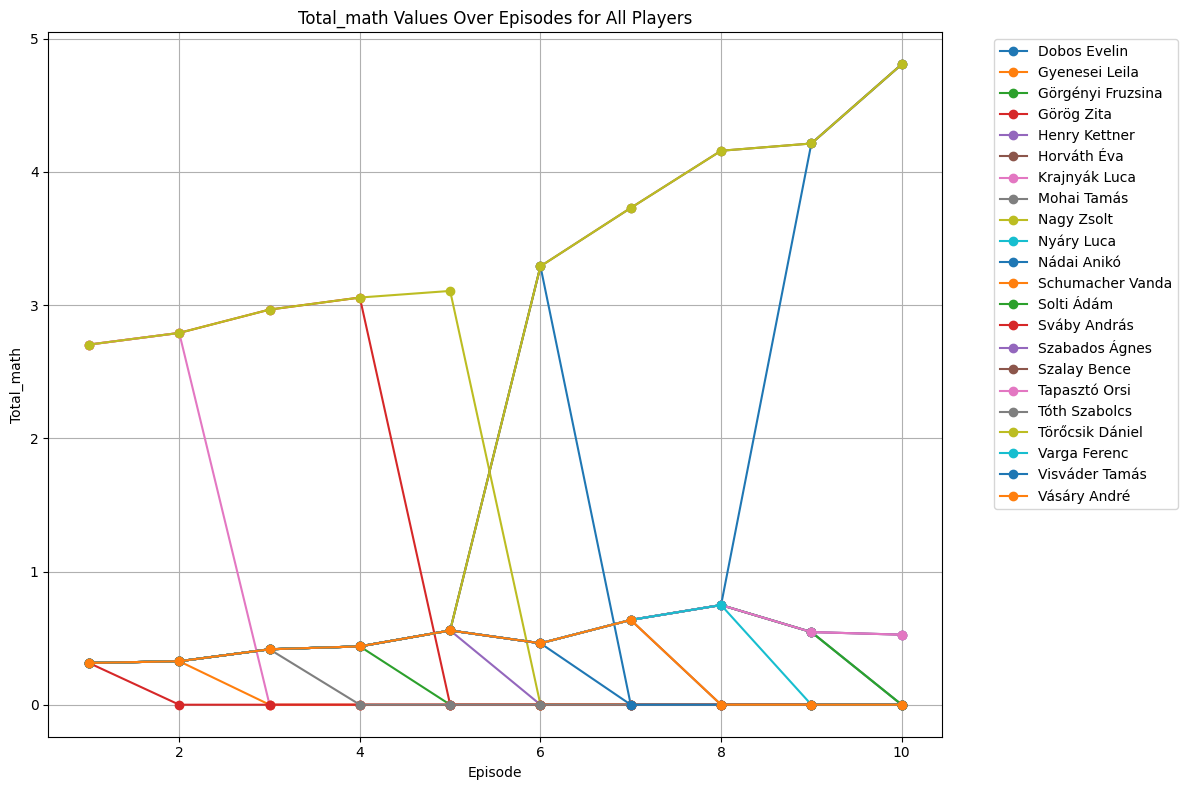

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_players_on_same_plot(df):
    plt.figure(figsize=(12, 8))
    
    for player_name in df.index:
        plt.plot(df.columns, df.loc[player_name], marker='o', label=player_name)
    
    plt.title("Total_math Values Over Episodes for All Players")
    plt.xlabel("Episode")
    plt.ylabel("Total_math")
    plt.grid(True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Places legend outside the plot
    plt.tight_layout()
    plt.show()

# Assuming 'df_total_math' is your DataFrame from earlier
plot_all_players_on_same_plot(df_total_math)


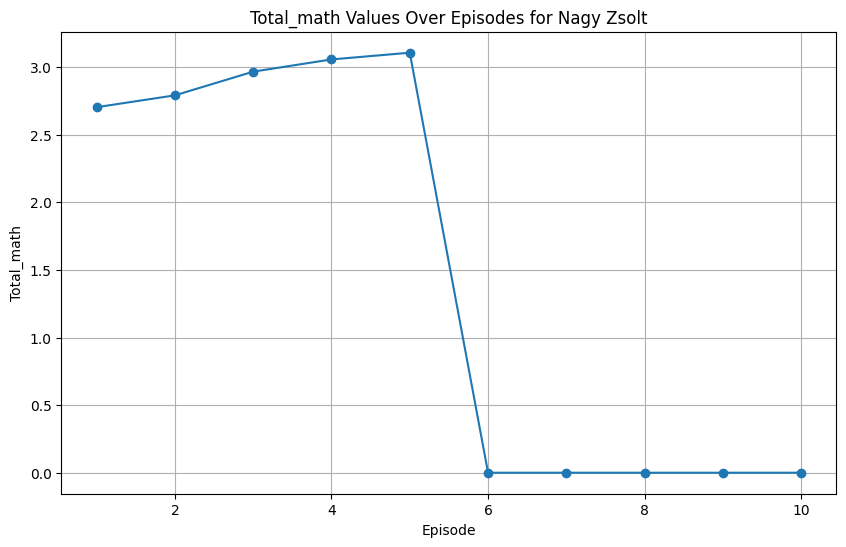

In [46]:
# To plot the time series for 'Tapasztó Orsi'
plot_player_timeseries(df_total_math, 'Nagy Zsolt')


In [47]:
df_total_math.to_csv('arulok_varhato.csv')

In [48]:
import pandas as pd
import plotly.express as px

def animate_barchart_plotly(df):
    # Prepare data in long format
    df_long = df.reset_index().melt(id_vars='index', var_name='Episode', value_name='Total_math')
    df_long.rename(columns={'index': 'Player'}, inplace=True)
    df_long['Episode'] = df_long['Episode'].astype(int)
    df_long.sort_values(['Episode', 'Total_math'], ascending=[True, False], inplace=True)
    
    # Create the animated bar chart
    fig = px.bar(df_long, x='Total_math', y='Player', color='Player', labels={'Player':'Játékos', 'Total_math':'Várható nyeremény (millió Ft)' , 'Episode': 'Epizód'},
                 orientation='h', animation_frame='Episode', range_x=[0, df.values.max() * 1.1],
                 title='Várható nyeremény játékosonként',
                 height=700)

    fig.update_layout(yaxis={'categoryorder':'total ascending'}, showlegend=False)
    fig.update_traces(texttemplate='%{x:.2f}', textposition='outside')
    fig.show()

# Assuming 'df_total_math' is your DataFrame
animate_barchart_plotly(df_total_math)


ModuleNotFoundError: No module named 'plotly'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import imageio
import os

def create_total_math_dataframe(results_all):
    # Collect all unique player names
    player_names = set()
    for episode in results_all:
        for player in results_all[episode]:
            player_names.add(player['name'])
    player_names = sorted(player_names)

    # Initialize the DataFrame
    df = pd.DataFrame(index=player_names, columns=sorted(results_all.keys()))

    # Fill the DataFrame with total_math values
    for episode in results_all:
        for player in results_all[episode]:
            name = player['name']
            total_math = player['total_math']
            df.loc[name, episode] = total_math

    # Convert data to float type and fill missing values with 0
    df = df.astype(float).fillna(0)
    return df

def create_bar_chart_frames(df):
    # Ensure the output directory exists
    output_dir = 'frames'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    episodes = sorted(df.columns)
    frames = []
    max_value = df.values.max() * 1.1  # To set consistent x-axis limit

    for episode in episodes:
        # Prepare data for the episode
        data = df[episode].sort_values(ascending=False)
        players = data.index.tolist()
        values = data.values

        # Create the bar chart
        plt.figure(figsize=(10, 8))
        bars = plt.barh(players, values, color='skyblue')

        # Add labels inside the bars
        for bar, value in zip(bars, values):
            plt.text(value - (max_value * 0.01), bar.get_y() + bar.get_height()/2,
                     f'{value:.2f}', va='center', ha='right', color='black', fontsize=10)

        # Set title and labels in Hungarian
        plt.title(f'Várható érték epizódonként - Epizód {episode}', fontsize=16)
        plt.xlabel('Várható érték', fontsize=14)
        plt.ylabel('Játékos', fontsize=14)

        # Set x-axis limits
        plt.xlim(0, max_value)

        # Invert y-axis to have the highest values on top
        plt.gca().invert_yaxis()

        # Remove spines for a cleaner look
        plt.gca().spines['right'].set_visible(False)
        plt.gca().spines['top'].set_visible(False)

        # Adjust layout
        plt.tight_layout()

        # Save the figure as a PNG image
        filename = os.path.join(output_dir, f'frame_{episode}.png')
        plt.savefig(filename)
        frames.append(imageio.imread(filename))
        plt.close()  # Close the figure to free up memory

    # Save the frames as a GIF
    output_gif = 'varhato_ertek_epizodonként.gif'
    imageio.mimsave(output_gif, frames, fps=1)

    # Clean up the frames directory
    for filename in os.listdir(output_dir):
        file_path = os.path.join(output_dir, filename)
        os.remove(file_path)
    os.rmdir(output_dir)

    print(f'GIF saved as {output_gif}')

# Assuming 'results_all' is your dictionary with simulation results
df_total_math = create_total_math_dataframe(results_all)

# Create the bar chart frames and compile into a GIF
create_bar_chart_frames(df_total_math)


C:\Users\takat\AppData\Local\Temp\ipykernel_6120\1617532233.py:74: DeprecationWarning:

Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.



GIF saved as varhato_ertek_epizodonként.gif


Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 681767.1053
Expected Payout per Bad Player: 3137785.0000
Probability Good Team Wins: 31.30%
Probability Bad Team Wins: 68.70%
Average number of turns: 9.14
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 533677.6316
Expected Payout per Bad Player: 2977562.5000
Probability Good Team Wins: 32.20%
Probability Bad Team Wins: 67.80%
Average number of turns: 9.50
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 413135.2632
Expected Payout per Bad Player: 2750626.6667
Probability Good Team Wins: 30.30%
Probability Bad Team Wins: 69.70%
Average number of turns: 10.14
Monte Carlo Simulation Results (After Modification):
Expected Payout per Good Player: 322958.6842
Expected Payout per Bad Player: 2492273.7500
Probability Good Team Wins: 26.80%
Probability Bad Team Wins: 73.20%
Average number of turns: 10.53
Monte Carlo Simulation Results

C:\Users\takat\AppData\Local\Temp\ipykernel_6120\2072079204.py:26: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



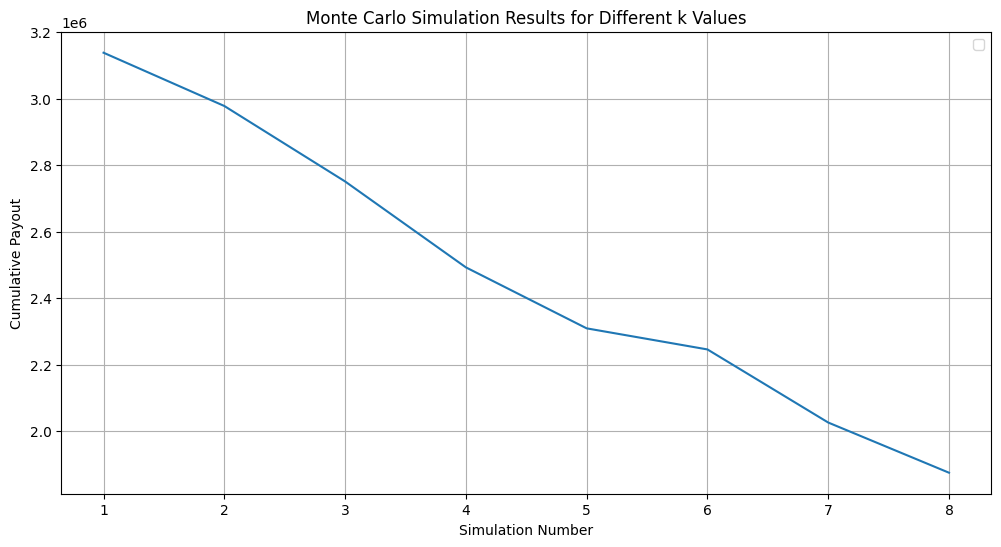

In [15]:
import matplotlib.pyplot as plt
n = 19  # Number of good players
k_values = [1, 2, 3, 4, 5, 6, 7, 8]  # Different numbers of bad players
num_simulations = 10000
starting_payout = 16_000_000
daily_payout = 0

# Run the simulation for each k and plot the results
plt.figure(figsize=(12, 6))
payouts=[]
for k in k_values:
    results = monte_carlo_simulation(n, k, starting_payout, num_simulations)
    payouts.append(results['Expected Payout per Bad Player'])
    print("Monte Carlo Simulation Results (After Modification):")
    print(f"Expected Payout per Good Player: {results['Expected Payout per Good Player']:.4f}")
    print(f"Expected Payout per Bad Player: {results['Expected Payout per Bad Player']:.4f}")
    print(f"Probability Good Team Wins: {results['Probability Good Wins'] * 100:.2f}%")
    print(f"Probability Bad Team Wins: {results['Probability Bad Wins'] * 100:.2f}%")
    print(f"Average number of turns: {results['Average number of turns']:.2f}")

plt.plot( k_values, payouts,)
plt.xticks(k_values)
plt.xlabel('Simulation Number')
plt.ylabel('Cumulative Payout')
plt.title('Monte Carlo Simulation Results for Different k Values')
plt.legend()
plt.grid(True)
plt.show()